Test data accuracy: 1.0


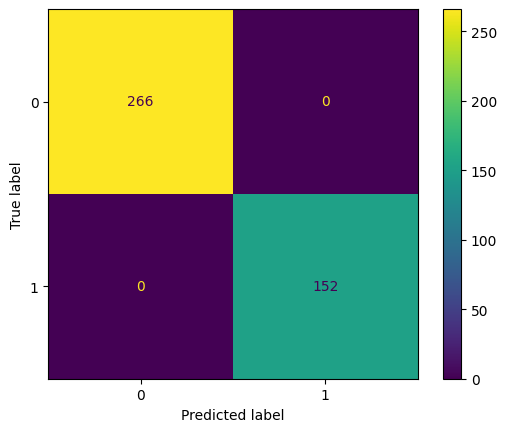

Decision Tree Text Representation:
|--- PassengerId <= 1299.50
|   |--- PassengerId <= 1294.50
|   |   |--- PassengerId <= 1293.50
|   |   |   |--- PassengerId <= 1142.50
|   |   |   |   |--- PassengerId <= 1139.50
|   |   |   |   |   |--- PassengerId <= 1133.50
|   |   |   |   |   |   |--- PassengerId <= 1129.50
|   |   |   |   |   |   |   |--- PassengerId <= 1123.50
|   |   |   |   |   |   |   |   |--- PassengerId <= 1104.50
|   |   |   |   |   |   |   |   |   |--- PassengerId <= 1100.50
|   |   |   |   |   |   |   |   |   |   |--- PassengerId <= 1099.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 37
|   |   |   |   |   |   |   |   |   |   |--- PassengerId >  1099.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- PassengerId >  1100.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- PassengerId >  1104.50
|   |   |   |   |   |   |   |   |   |--- PassengerId <=

In [1]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_text, export_graphviz
import matplotlib.pyplot as plt
import graphviz

# Load data
data_train = pd.read_csv('gender_submission_train.csv')
data_test = pd.read_csv('gender_submission_test.csv')

# Preprocess data
X_train = data_train.drop('Survived', axis=1).values
y_train = data_train['Survived'].values

X_test = data_test.drop('Survived', axis=1).values
y_test = data_test['Survived'].values

# Train model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Make predictions
y_test_prediction = clf.predict(X_test)
y_train_prediction = clf.predict(X_train)

# Evaluate model
test_data_accuracy = accuracy_score(y_test, y_test_prediction)
print("Test data accuracy:", test_data_accuracy)

# Confusion matrix
confusion_matrix_result = confusion_matrix(y_test, y_test_prediction)
cm_display = ConfusionMatrixDisplay(confusion_matrix_result, display_labels=[0, 1])
cm_display.plot()
plt.show()

# Decision Tree Text Representation
text_representation = export_text(clf, feature_names=["PassengerId"])
print("Decision Tree Text Representation:")
print(text_representation)

# Decision Tree Graph
dot_data = export_graphviz(clf, out_file=None, feature_names=["PassengerId"],
                           class_names=['0', '1'], filled=True, max_depth=3)

graph = graphviz.Source(dot_data, format="png")